In [ ]:
pip install pyforest

In [2]:
from pyforest import*
lazy_imports()

['import spacy',
 'import skimage',
 'from sklearn.model_selection import train_test_split',
 'from sklearn.linear_model import LassoCV',
 'import statsmodels.api as sm',
 'from sklearn.preprocessing import StandardScaler',
 'from sklearn.decomposition import PCA',
 'from openpyxl import load_workbook',
 'import tensorflow as tf',
 'import datetime as dt',
 'from sklearn.ensemble import RandomForestRegressor',
 'import tqdm',
 'from sklearn.manifold import TSNE',
 'import numpy as np',
 'from sklearn.model_selection import cross_val_score',
 'import re',
 'from statsmodels.tsa.arima_model import ARIMA',
 'from dask import dataframe as dd',
 'from sklearn import svm',
 'from pyspark import SparkContext',
 'import plotly.express as px',
 'import pydot',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'from sklearn import metrics',
 'import os',
 'from scipy import stats',
 'from fbprophet import Prophet',
 'import keras',
 'from xlrd import open_workbook',
 'from sklearn.clu

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
Train_data=pd.read_csv(r'C:/Users/HP/Desktop/Train.csv')
Test_data=pd.read_csv(r'C:/Users/HP/Desktop/Test.csv')

In [6]:
Train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
Test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [8]:
print('Train_data:',Train_data.shape)
print('Test_data:',Test_data.shape)

Train_data: (8523, 12)
Test_data: (5681, 11)


In [9]:
Train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [10]:
Train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
Test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [12]:
Train_data['source'] = 'train'
Test_data['source'] = 'test'
df=pd.concat([Train_data,Test_data], ignore_index=True)

In [13]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [14]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
14199,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
14200,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
14202,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test
14203,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test


In [15]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [16]:
df.shape

(14204, 13)

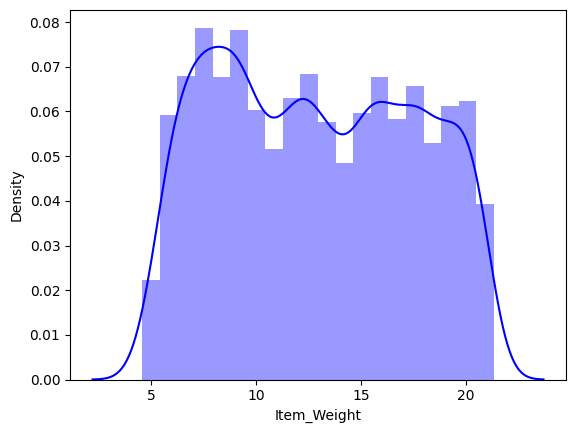

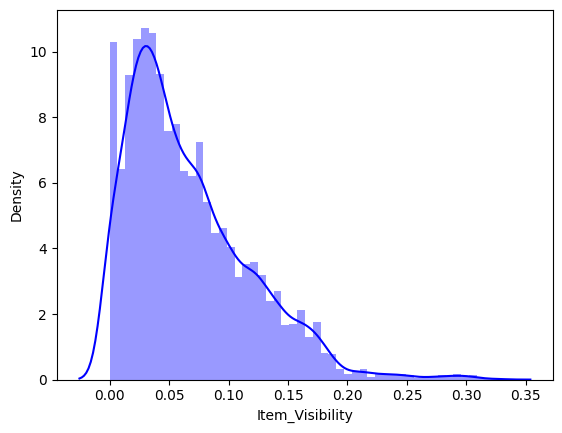

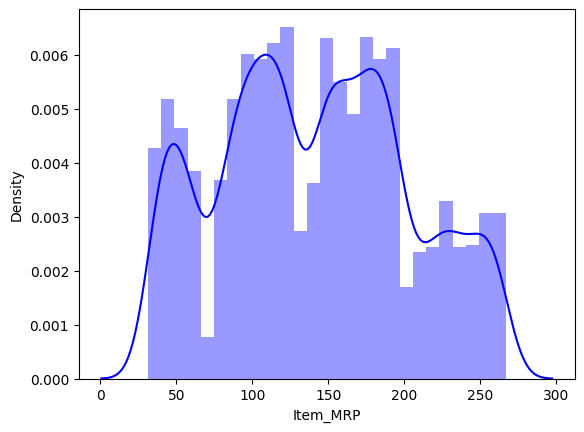

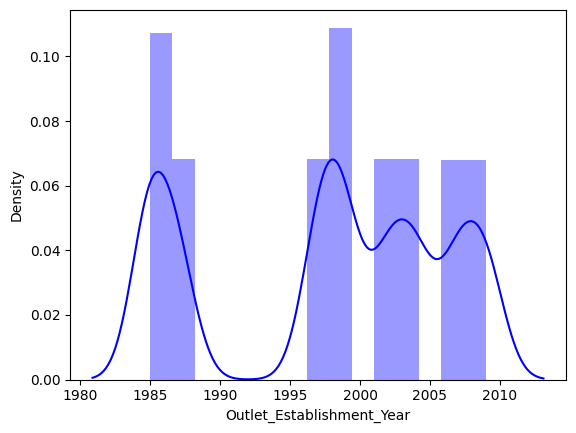

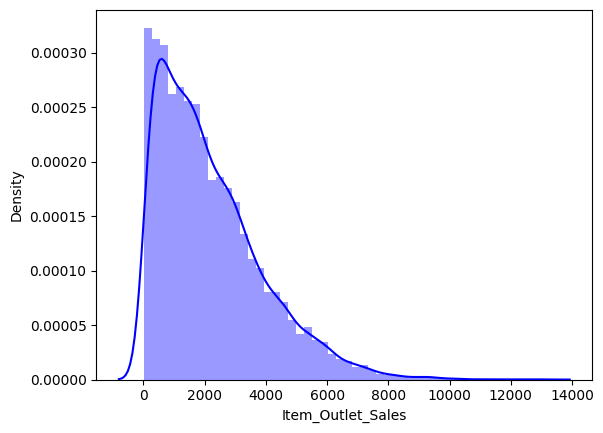

In [17]:
for i in Train_data.describe().columns:
  sns.distplot(Train_data[i].dropna(),color="blue");
  plt.show()

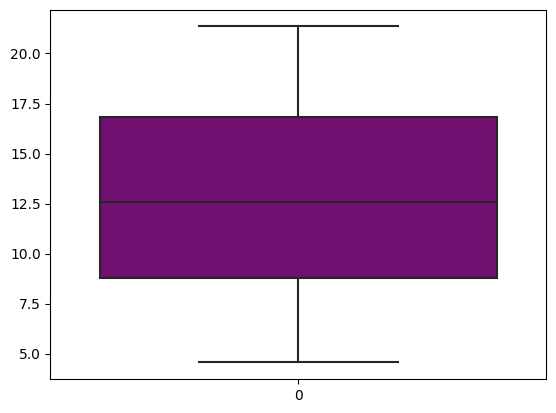

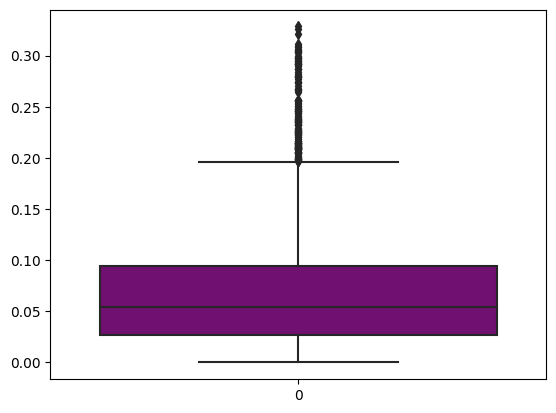

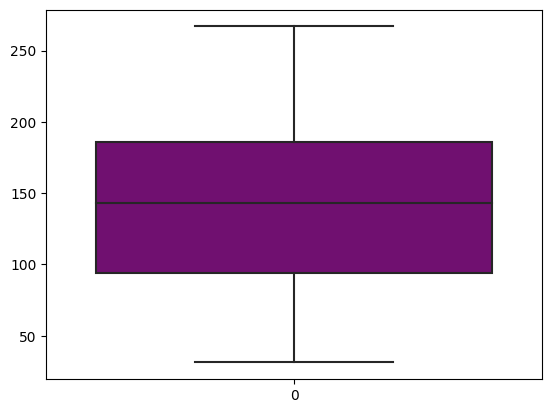

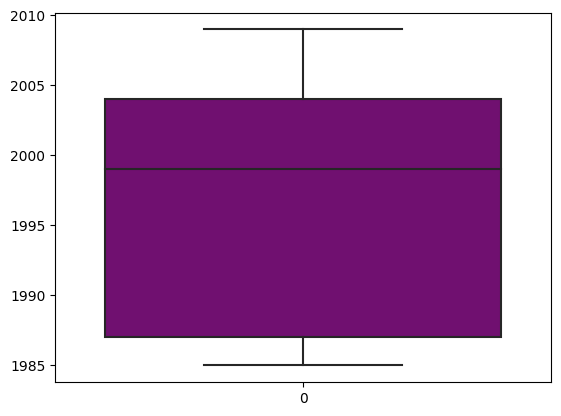

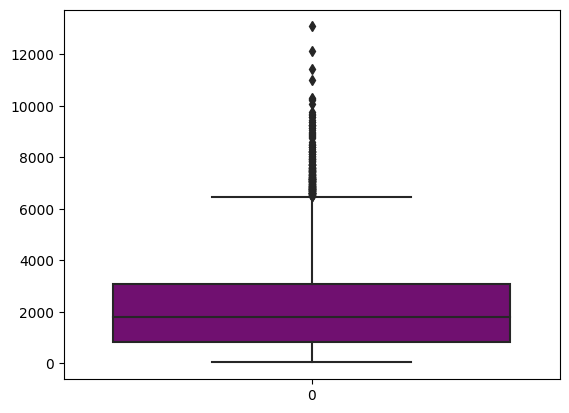

In [18]:
for i in Train_data.describe().columns:
  sns.boxplot(Train_data[i].dropna(),color="purple")
  plt.show()

<Axes: xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

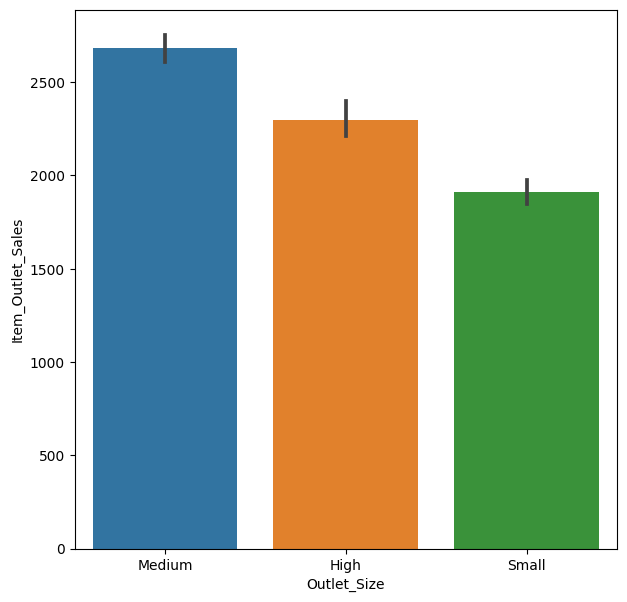

In [19]:
plt.figure(figsize=(7,7))
sns.barplot(x='Outlet_Size', y='Item_Outlet_Sales', data= Train_data)

<Axes: xlabel='count', ylabel='Item_Type'>

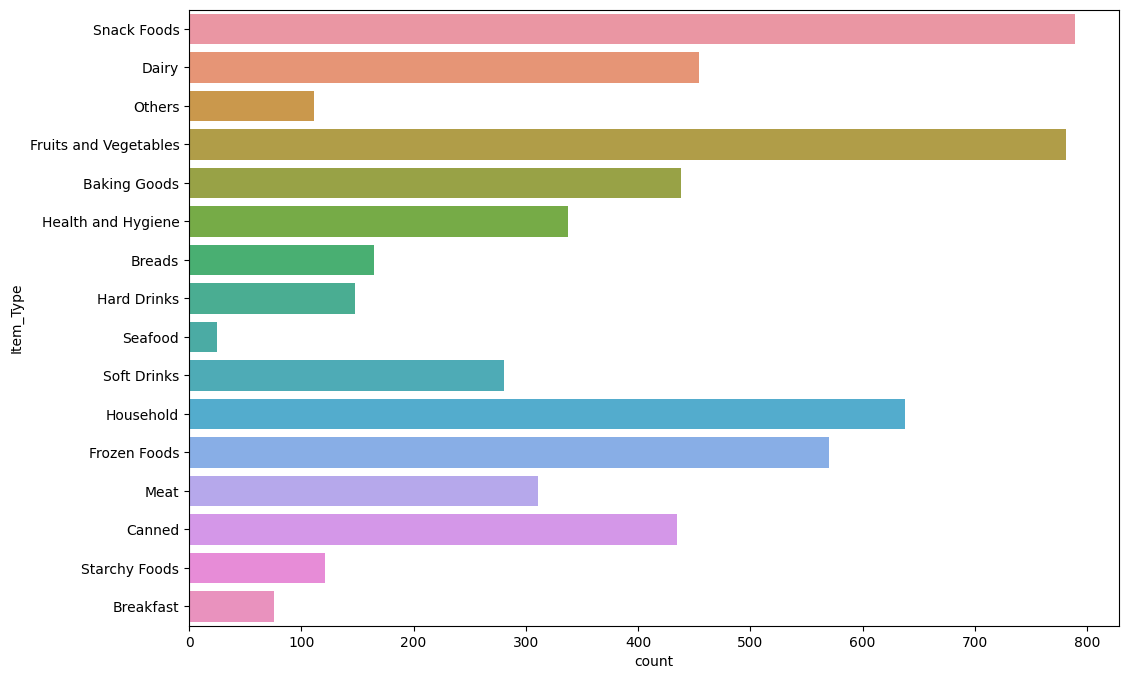

In [20]:
plt.figure(figsize=(12,8))
sns.countplot(y='Item_Type', data= Test_data)

In [21]:
Train_data.Item_Type.value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [22]:
Train_data.Outlet_Size.value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [23]:
Train_data.Outlet_Location_Type.value_counts()

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

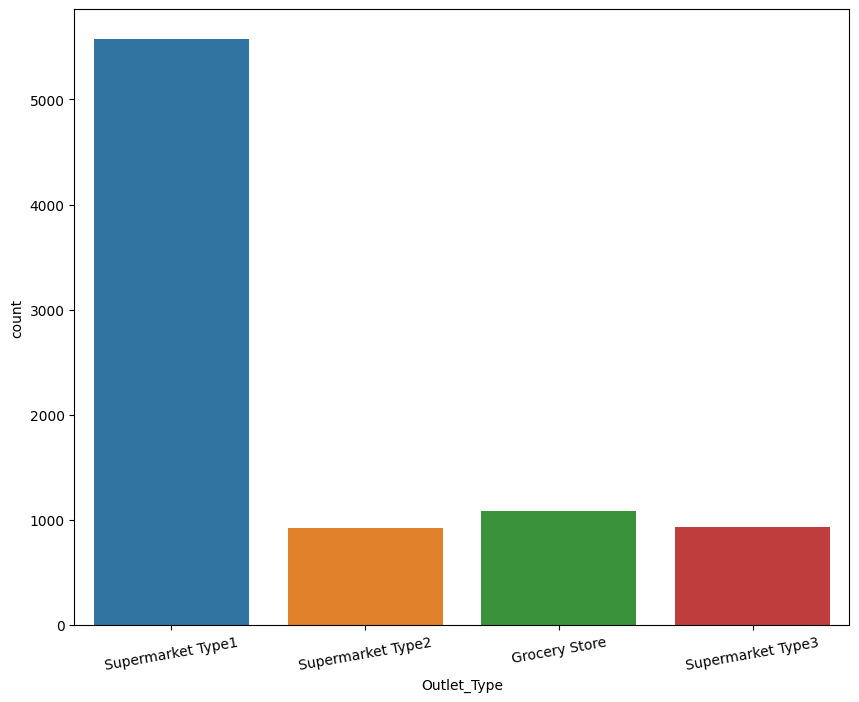

In [24]:
plt.figure(figsize=(10,8))
sns.countplot(data= Train_data,x='Outlet_Type')
plt.xticks(rotation=10)

In [25]:
Train_data.Outlet_Type.value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

<Axes: title={'center': 'Item_Weight and Item_Outlet_Sales Analysis'}, xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

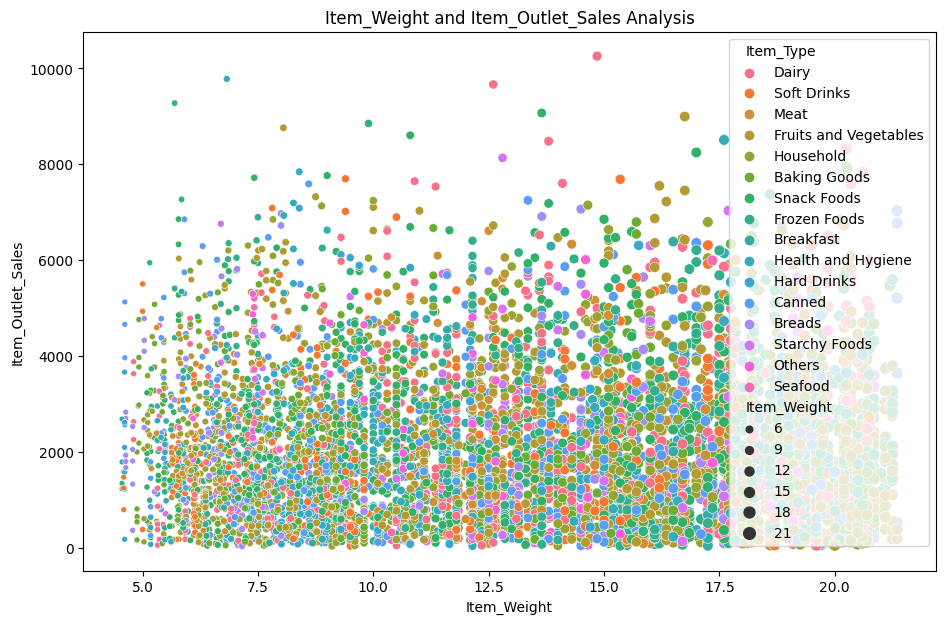

In [26]:
plt.figure(figsize=(11,7))
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')
plt.title('Item_Weight and Item_Outlet_Sales Analysis')
sns.scatterplot(x='Item_Weight', y='Item_Outlet_Sales',hue='Item_Type', size='Item_Weight',data=Train_data)

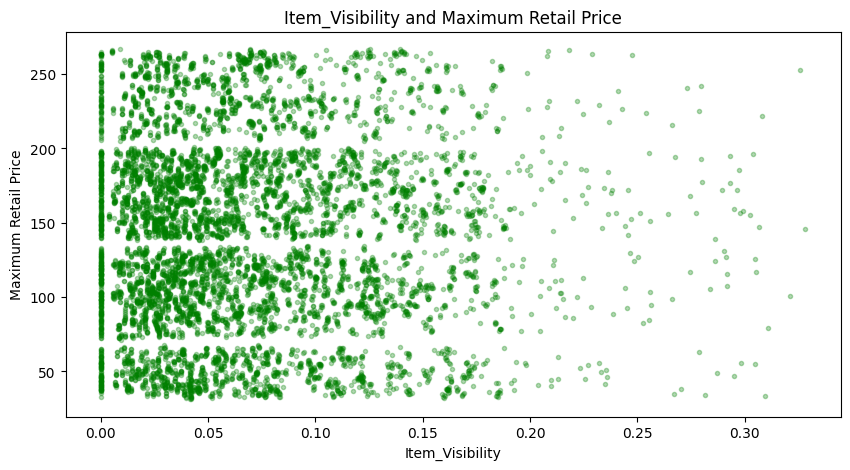

In [27]:
plt.figure(figsize=(10,5))
plt.xlabel('Item_Visibility')
plt.ylabel('Maximum Retail Price')
plt.title('Item_Visibility and Maximum Retail Price')
plt.plot(Train_data.Item_Visibility, Train_data.Item_MRP, ".",alpha = 0.3,color="green")

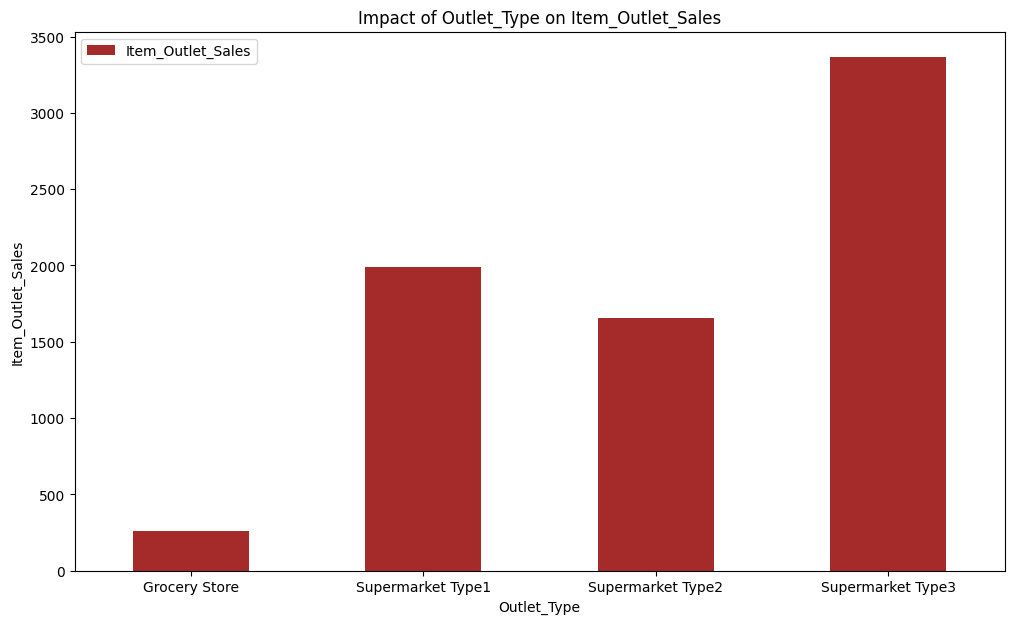

In [28]:
Item_Type_pivot = \
Train_data.pivot_table(index='Outlet_Type', values="Item_Outlet_Sales", aggfunc=np.median)

Item_Type_pivot.plot(kind='bar',color='brown',figsize=(12,7))
plt.xlabel('Outlet_Type')
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

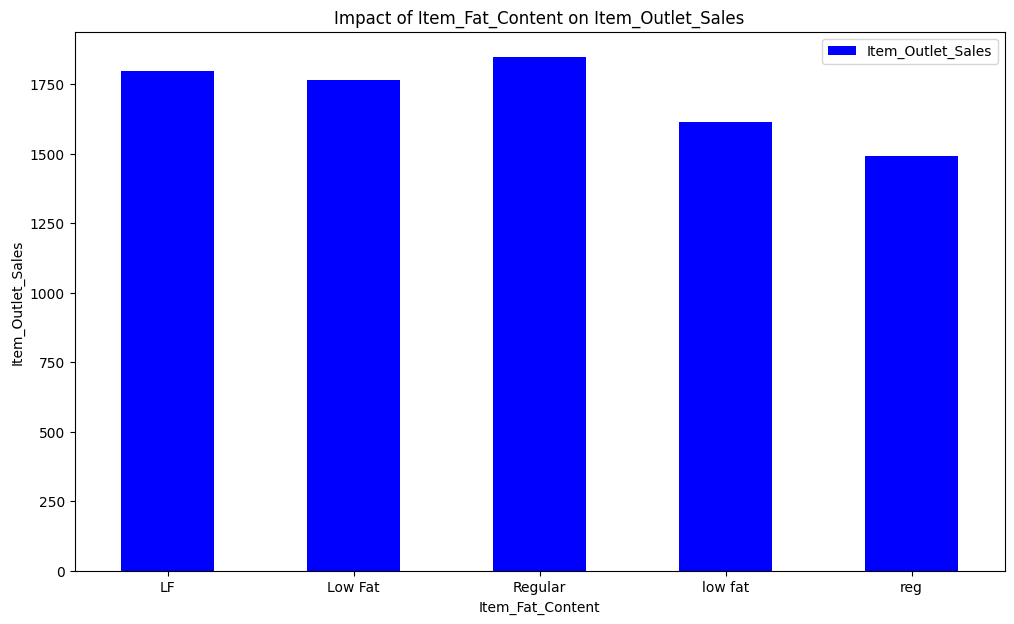

In [29]:
Item_Type_pivot = \
Train_data.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.median)

Item_Type_pivot.plot(kind='bar',color='blue',figsize=(12,7))
plt.xlabel('Item_Fat_Content')
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

In [30]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: count, dtype: int64

In [31]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat',})

In [32]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    9185
Regular    5019
Name: count, dtype: int64

In [33]:
Train_data['Item_Fat_Content'] = Train_data['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat',})

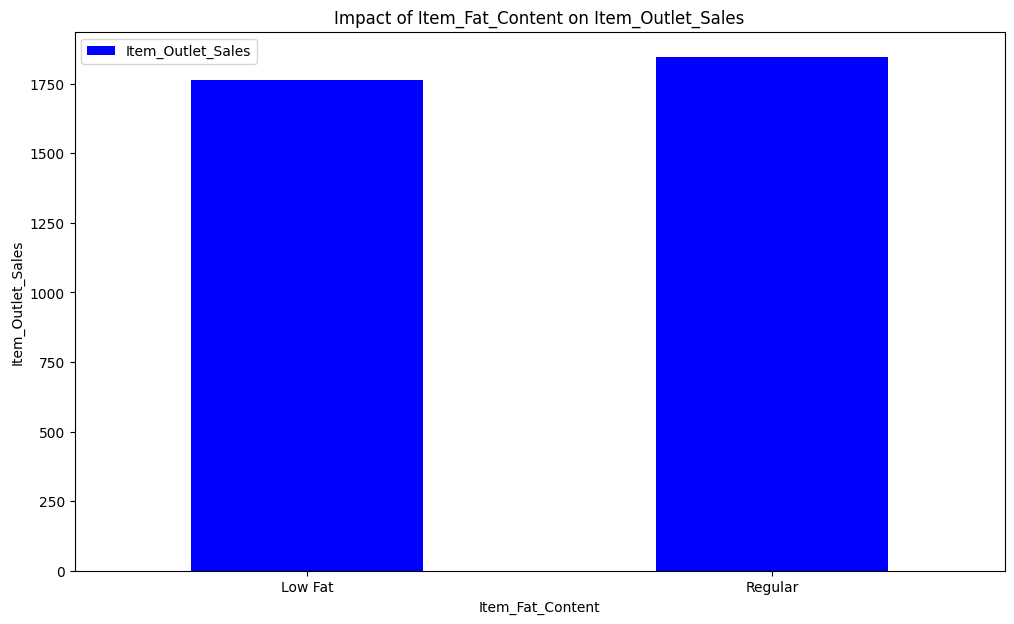

In [34]:
Item_Fat_Content_pivot =\
Train_data.pivot_table(index='Item_Fat_Content',values='Item_Outlet_Sales',aggfunc=np.median)
Item_Fat_Content_pivot.plot(kind='bar',color='blue',figsize=(12,7))
plt.xlabel('Item_Fat_Content')
plt.ylabel("Item_Outlet_Sales")

plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

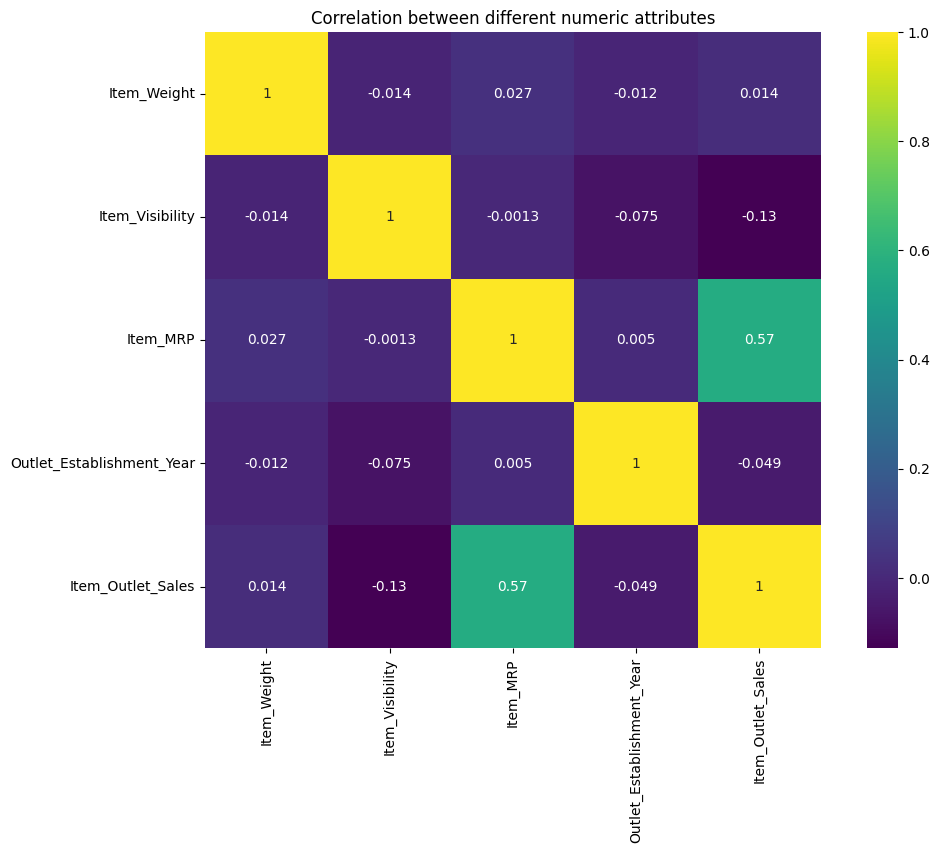

In [35]:
# Select only the numeric columns for correlation analysis
numeric_columns = Train_data[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']]
# Create the correlation matrix
correlation_matrix = numeric_columns.corr()
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, vmax=1, square=True, annot=True, cmap='viridis')
plt.title('Correlation between different numeric attributes')
plt.show()


In [36]:
df['Item_Weight'].mean() #we will replace the NaN values with this mean

12.792854228644284

In [37]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True) #missing values have been replaced with the mean using the fillna function.

In [38]:
df['Outlet_Size'].value_counts()

Outlet_Size
Medium    4655
Small     3980
High      1553
Name: count, dtype: int64

In [39]:
df['Outlet_Size'].fillna('Medium', inplace=True)

In [40]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [41]:
Train_data.shape

(8523, 13)

In [42]:
Test_data.shape

(5681, 12)

In [43]:
df.shape

(14204, 13)

In [44]:
df[df['Item_Visibility']==0]['Item_Visibility'].count()

879

In [45]:
df['Item_Visibility'].fillna(df['Item_Visibility'].median(), inplace=True)

In [46]:
df['Outlet_Establishment_Year'].value_counts()

Outlet_Establishment_Year
1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: count, dtype: int64

In [47]:
df['Outlet_Years'] = 2009-df['Outlet_Establishment_Year']
df['Outlet_Years'].describe()

count    14204.000000
mean        11.169319
std          8.371664
min          0.000000
25%          5.000000
50%         10.000000
75%         22.000000
max         24.000000
Name: Outlet_Years, dtype: float64

In [48]:
df['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: count, dtype: int64

In [49]:
df['Item_Identifier'].value_counts()

Item_Identifier
FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: count, Length: 1559, dtype: int64

In [50]:
#Changing only the first 2 characters (i.e. the category ID)
df['New_Item_type'] = df['Item_Identifier'].apply(lambda x: x[0:2])

In [51]:
#Rename them to more intuitive  categories:
df['New_Item_type'] = df['New_Item_type'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
df['New_Item_type'].value_counts()

New_Item_type
Food              10201
Non-Consumable     2686
Drinks             1317
Name: count, dtype: int64

In [52]:
df.loc[df['New_Item_type']=='Non-Consumable','Item_Fat_Content']= "Non-Edible"
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat       6499
Regular       5019
Non-Edible    2686
Name: count, dtype: int64

In [53]:
item_visib_avg = df.pivot_table(values='Item_Visibility', index='Item_Identifier')

In [54]:
item_visib_avg

,Item_Visibility
Item_Identifier,
DRA12,0.034938
DRA24,0.045646
DRA59,0.133384
DRB01,0.079736
DRB13,0.006799
...,...
NCZ30,0.027302
NCZ41,0.056396
NCZ42,0.011015


In [55]:
function = lambda x: x['Item_Visibility']/item_visib_avg['Item_Visibility'][item_visib_avg.index == x['Item_Identifier']][0]
df['item_visib_avg'] = df.apply(function,axis=1).astype(float)

In [56]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Years,New_Item_type,item_visib_avg
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,10,Food,0.931078
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,0,Drinks,0.933420
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,10,Food,0.960069
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,11,Food,0.000000
4,NCD19,8.93,Non-Edible,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,22,Non-Consumable,0.000000


In [57]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
#New variable for outlet
df['Outlet'] = label.fit_transform(df['Outlet_Identifier'])
varib = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','New_Item_type','Outlet_Type','Outlet']
for i in varib:
  df[i] = label.fit_transform(df[i])
    
#df['Item_Fat_Content']= le.fit_transform(df['Item_Fat_Content'])
#df['Item_Type']= le.fit_transform(df['Item_Type'])
#df['Outlet_Size']= le.fit_transform(df['Outlet_Size'])
#df['Outlet_Location_Type']= le.fit_transform(df['Outlet_Location_Type'])
#df['Outlet_Type']= le.fit_transform(df['Outlet_Type'])

In [58]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Years,New_Item_type,item_visib_avg,Outlet
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380,train,10,1,0.931078,9
1,DRC01,5.92,2,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228,train,0,0,0.933420,3
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700,train,10,1,0.960069,9
3,FDX07,19.20,2,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,0,732.3800,train,11,1,0.000000,0
4,NCD19,8.93,1,0.000000,Household,53.8614,OUT013,1987,0,2,1,994.7052,train,22,2,0.000000,1


In [59]:
df = pd.get_dummies(df, columns =['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','New_Item_type','Outlet_Type','Outlet'])
df.dtypes 

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
source                        object
Outlet_Years                   int64
item_visib_avg               float64
Item_Fat_Content_0              bool
Item_Fat_Content_1              bool
Item_Fat_Content_2              bool
Outlet_Location_Type_0          bool
Outlet_Location_Type_1          bool
Outlet_Location_Type_2          bool
Outlet_Size_0                   bool
Outlet_Size_1                   bool
Outlet_Size_2                   bool
New_Item_type_0                 bool
New_Item_type_1                 bool
New_Item_type_2                 bool
Outlet_Type_0                   bool
Outlet_Type_1                   bool
Outlet_Type_2                   bool
Outlet_Type_3                   bool
O

In [60]:
df.drop(['Item_Type','Outlet_Establishment_Year'],axis=1, inplace=True)

In [61]:
train = df.loc[df['source'] == 'train']
test = df.loc[df['source'] == 'test']

In [62]:
train.drop(['source'],axis=1,inplace=True)

In [63]:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)

In [64]:
#X_train = train.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'],axis=1)
#y_train = train['Item_Outlet_Sales']
#X_test = test.drop(['Item_Identifier','Outlet_Identifier'],axis=1).copy()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
   train.drop(['Item_Outlet_Sales', 'Item_Identifier', 'Outlet_Identifier'], axis=1),
    train['Item_Outlet_Sales'],
    test_size=0.2,
    random_state=42
)


In [65]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
linreg_pred = linreg.predict(X_test)

In [66]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
linreg_mae = mean_absolute_error(y_test, linreg_pred)
linreg_mse = np.sqrt(mean_squared_error(y_test,linreg_pred))
linreg_r2 = r2_score(y_test, linreg_pred)
linreg_accuracy=round(linreg.score(X_train,y_train)*100)

print("MAE of the linear regression model is: ",linreg_mae)
print("MSE of the linear regression model is: ",linreg_mse)
print("R2 score of the linear regression model is: ",linreg_r2)
print("Accuracy of the linear regression model is: ",linreg_accuracy)

MAE of the linear regression model is:  791.1273059523692
MSE of the linear regression model is:  1067.5206742325358
R2 score of the linear regression model is:  0.5807163574349291
Accuracy of the linear regression model is:  56


In [67]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()

In [68]:
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [69]:
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_mse = np.sqrt(mean_squared_error(y_test,rf_pred))
rf_r2 = r2_score(y_test, rf_pred)
rf_accuracy=round(rf.score(X_train,y_train)*100)

print("MAE of the Random forest model is: ",rf_mae)
print("MSE of the Random forest model is: ",rf_mse)
print("R2 score of the Random forest model is: ",rf_r2)
print("Accuracy of the Random forest model is: ",rf_accuracy)

MAE of the Random forest model is:  749.7071892234604
MSE of the Random forest model is:  1082.567298416813
R2 score of the Random forest model is:  0.5688135163827244
Accuracy of the Random forest model is:  94


In [70]:
rf = RandomForestRegressor(n_estimators=100, max_depth=5, min_samples_leaf=100, n_jobs=5, 
                           random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [71]:
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_mse = np.sqrt(mean_squared_error(y_test,rf_pred))
rf_r2 = r2_score(y_test, rf_pred)
rf_accuracy=round(rf.score(X_train,y_train)*100)

print("MAE of the Random forest model is: ",rf_mae)
print("MSE of the Random forest model is: ",rf_mse)
print("R2 score of the Random forest model is: ",rf_r2)
print("Accuracy of the Random forest model is: ",rf_accuracy)

MAE of the Random forest model is:  715.8725891801671
MSE of the Random forest model is:  1017.6904186895231
R2 score of the Random forest model is:  0.6189458445428471
Accuracy of the Random forest model is:  60


In [72]:
from xgboost import XGBRegressor
xgb= XGBRegressor()

In [73]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [74]:
xgb_pred= xgb.predict(X_test)

In [75]:
xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_mse = np.sqrt(mean_squared_error(y_test,xgb_pred))
xgb_r2 = r2_score(y_test, xgb_pred)
xgb_accuracy=round(xgb.score(X_train,y_train)*100)

print("MAE of the XGBoost model is: ",xgb_mae)
print("MAE of the XGBoost model is: ",xgb_mae)
print("R2 score of the XGBoost model is: ",xgb_r2)
print("Accuracy of the XGBoost model is: ",xgb_accuracy)

MAE of the XGBoost model is:  778.0747634237719
MAE of the XGBoost model is:  778.0747634237719
R2 score of the XGBoost model is:  0.5407573485444039
Accuracy of the XGBoost model is:  86


In [76]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)

tree.fit(X_train,y_train)
tree_pred = tree.predict(X_test)

In [77]:
tree_mae = mean_absolute_error(y_test, tree_pred)
tree_mse = np.sqrt(mean_squared_error(y_test,tree_pred))
tree_r2 = r2_score(y_test, tree_pred)
tree_accuracy=round(tree.score(X_train,y_train)*100)

print("MAE of the Decision Tree model is: ",tree_mae)
print("MAE of the Decision Tree model is: ",tree_mae)
print("R2 score of the Decision Tree model is: ",tree_r2)
print("Accuracy of the Decision Tree model is: ",tree_accuracy)

MAE of the Decision Tree model is:  727.5709471906385
MAE of the Decision Tree model is:  727.5709471906385
R2 score of the Decision Tree model is:  0.6024620638249953
Accuracy of the Decision Tree model is:  61


In [78]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(n_estimators=50, learning_rate =.01)
ada.fit(X_train,y_train)
ada_pred = ada.predict(X_test)

In [79]:
ada_mae = mean_absolute_error(y_test, ada_pred)
ada_mse = np.sqrt(mean_squared_error(y_test,ada_pred))
ada_r2 = r2_score(y_test, ada_pred)
ada_accuracy=round(ada.score(X_train,y_train)*100)
print("MAE of the AdaBoostRegressor model is: ",ada_mae)
print("MAE of the AdaBoostRegressor model is: ",ada_mae)
print("R2 score of the AdaBoostRegressor model is: ",ada_r2)
print("Accuracy of the AdaBoostRegressor model is: ",ada_accuracy)

MAE of the AdaBoostRegressor model is:  790.7621513028137
MAE of the AdaBoostRegressor model is:  790.7621513028137
R2 score of the AdaBoostRegressor model is:  0.5479455493624983
Accuracy of the AdaBoostRegressor model is:  54


In [80]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate =.2)
gbr.fit(X_train,y_train)
gbr_pred = gbr.predict(X_test)

In [81]:
gbr_mae = mean_absolute_error(y_test, gbr_pred)
gbr_mse = np.sqrt(mean_squared_error(y_test,gbr_pred))
gbr_r2 = r2_score(y_test, gbr_pred)
gbr_accuracy=round(gbr.score(X_train,y_train)*100)
print("MAE of the GradientBoostingRegressor model is: ",gbr_mae)
print("MAE of the GradientBoostingRegressor model is: ",gbr_mae)
print("R2 score of the GradientBoostingRegressor model is: ",gbr_r2)
print("Accuracy of the GradientBoostingRegressor model is: ",gbr_accuracy)

MAE of the GradientBoostingRegressor model is:  728.600387664704
MAE of the GradientBoostingRegressor model is:  728.600387664704
R2 score of the GradientBoostingRegressor model is:  0.6042010888909015
Accuracy of the GradientBoostingRegressor model is:  63


In [82]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train,y_train)
knn_pred = gbr.predict(X_test)

In [83]:
knn_mae = mean_absolute_error(y_test, knn_pred)
knn_mse = np.sqrt(mean_squared_error(y_test,knn_pred))
knn_r2 = r2_score(y_test, knn_pred)
knn_accuracy=round(knn.score(X_train,y_train)*100)
print("MAE of the KNeighborsRegressor model is: ",knn_mae)
print("MAE of the KNeighborsRegressor model is: ",knn_mae)
print("R2 score of the KNeighborsRegressor model is: ",knn_r2)
print("Accuracy of the KNeighborsRegressor model is: ",knn_accuracy)

MAE of the KNeighborsRegressor model is:  728.600387664704
MAE of the KNeighborsRegressor model is:  728.600387664704
R2 score of the KNeighborsRegressor model is:  0.6042010888909015
Accuracy of the KNeighborsRegressor model is:  59


In [84]:
df.head(1)

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,source,Outlet_Years,item_visib_avg,Item_Fat_Content_0,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.3,0.016047,249.8092,OUT049,3735.138,train,10,0.931078,True,...,False,False,False,False,False,False,False,False,False,True


In [85]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Identifier', 'Item_Outlet_Sales', 'source', 'Outlet_Years',
       'item_visib_avg', 'Item_Fat_Content_0', 'Item_Fat_Content_1',
       'Item_Fat_Content_2', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Size_0',
       'Outlet_Size_1', 'Outlet_Size_2', 'New_Item_type_0', 'New_Item_type_1',
       'New_Item_type_2', 'Outlet_Type_0', 'Outlet_Type_1', 'Outlet_Type_2',
       'Outlet_Type_3', 'Outlet_0', 'Outlet_1', 'Outlet_2', 'Outlet_3',
       'Outlet_4', 'Outlet_5', 'Outlet_6', 'Outlet_7', 'Outlet_8', 'Outlet_9'],
      dtype='object')

In [86]:
data = {'Item_Identifier':150, 'Item_Weight':10, 'Item_Fat_Content':0, 'Item_Visibility':0.015,
       'Item_Type':4, 'Item_MRP':250, 'Outlet_Identifier':9,
       'Outlet_Establishment_Year':2000, 'Outlet_Size':1, 'Outlet_Location_Type':0,
       'Outlet_Type':1}
index= [0]
new_df = pd.DataFrame(data, index)
new_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,150,10,0,0.015,4,250,9,2000,1,0,1
